In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/marathon_data.csv', index_col=0)
df['time'] = df['time'].str.replace('.', ':')
df['time'] = df['time'].str.replace(',', '.')
df['time'] = df['time'].str.replace(r'^(\d:\d\d\.\d)$', r'00:0\1')
df['time'] = df['time'].str.replace(r'^(\d\d:\d\d\.\d)$', r'00:\1')
df['time'] = df['time'].str.replace(r'^(\d:\d\d:\d\d\.\d)$', r'0\1')
df['time'] = pd.to_timedelta(df['time'])/ np.timedelta64(1, 'm')
df['time per km'] = df['time']/df['category']

In [3]:
df.head()

,name,birth year,age,age group,gender,race year,category,rank,time,city,canton,country,latitude,longitude,time per km
0,Aarskog Kay-Morten,1981,36,30-40,male,2017,10,676.,75.811667,Oteren,Troms,NO,69.255568,19.884419,7.581167
1,Haaland Arne Kristoffer,1981,36,30-40,male,2017,21,179.,97.283333,Oteren,Troms,NO,69.255568,19.884419,4.632540
2,Abadie Théo,1994,23,20-30,male,2017,21,484.,123.618333,Ecublens,VD,CH,46.529636,6.561525,5.886587
3,Alves Maria,1978,39,30-40,female,2017,10,315.,56.426667,Ecublens,VD,CH,46.529636,6.561525,5.642667
4,Angües José,1993,24,20-30,male,2017,10,423.,52.993333,Ecublens,VD,CH,46.529636,6.561525,5.299333


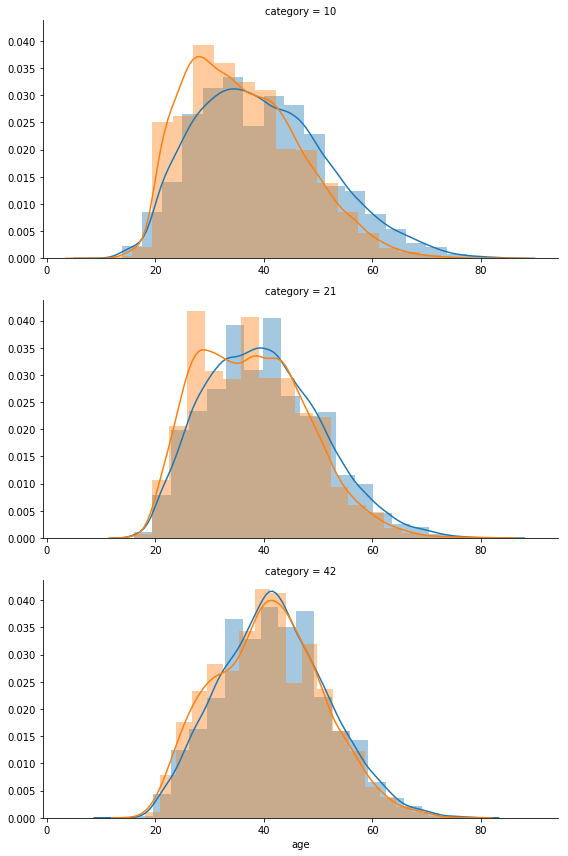

In [37]:
g = sns.FacetGrid(df, row='category', hue='gender', size=4, aspect=2)
g.map(sns.distplot, *['age'], **{"bins" : 20})

(2, 11)

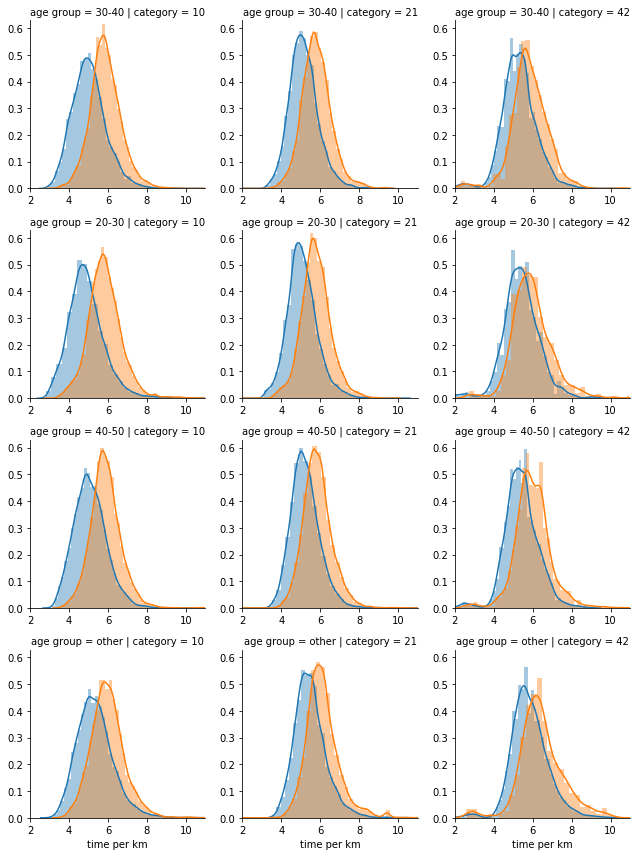

In [32]:
g = sns.FacetGrid(df, col='category', row='age group', hue='gender')
g.map(sns.distplot, 'time per km')
plt.xlim(2, 11)

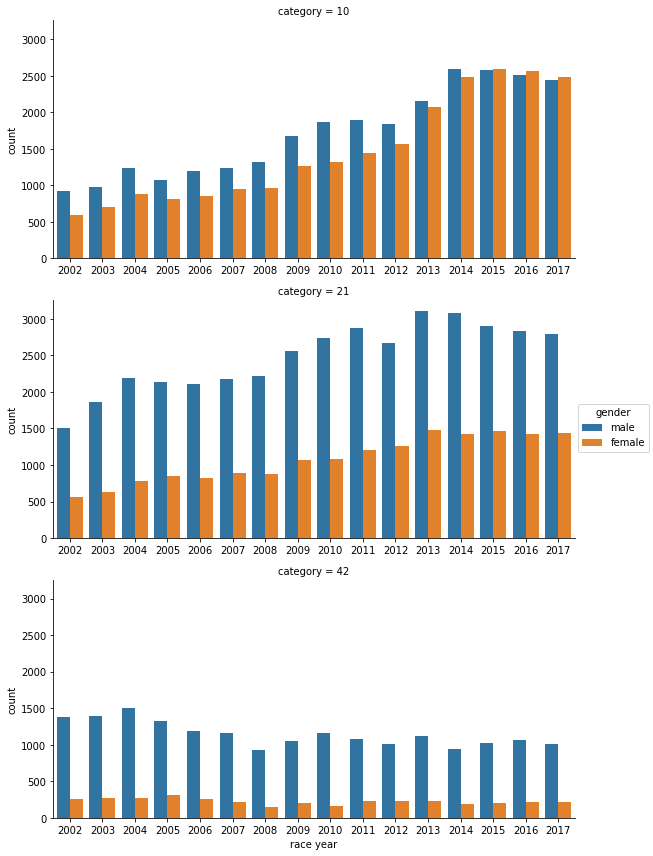

In [54]:
sns.factorplot(
    kind = 'count', 
    x = 'race year', 
    hue = 'gender',
    row = 'category',
    data = df,
    size = 4,
    aspect = 2
)

In [69]:
df.groupby(['category', 'gender']).mean()[['age', 'time', 'time per km']]

age        time  time per km
category gender                                    
10       female  36.104541   58.812040     5.881204
         male    39.725823   50.911684     5.091168
21       female  37.872100  122.882337     5.851540
         male    39.917075  109.692579     5.223456
42       female  40.794801  253.291125     6.030741
         male    41.880020  230.259848     5.482377

In [72]:
df.describe()[['age', 'time', 'time per km']]

,age,time,time per km
count,130069.000000,130069.000000,130069.000000
mean,39.215785,110.778456,5.456909
std,10.896943,65.172298,0.903866
min,8.000000,0.278333,0.013254
25%,31.000000,57.463333,4.864127
50%,39.000000,101.636667,5.416190
75%,46.000000,127.828333,5.996905
max,85.000000,517.891667,15.999167


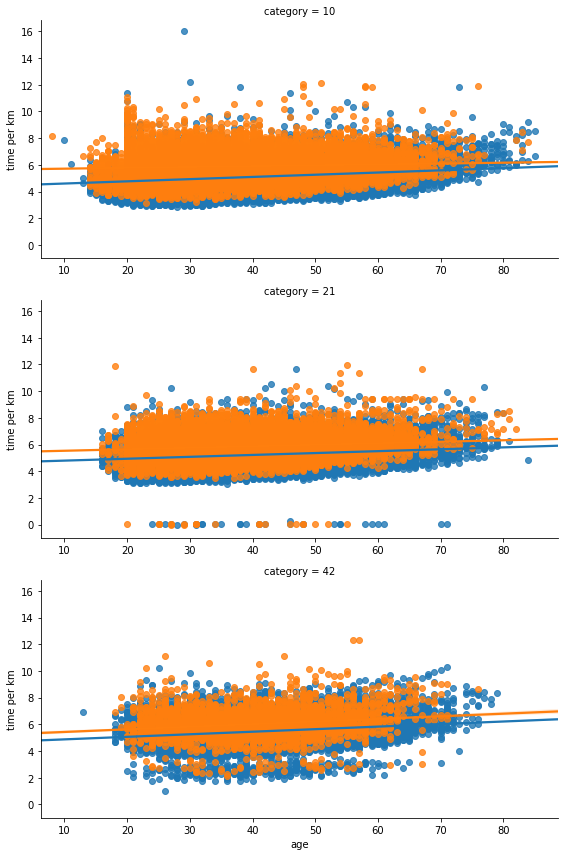

In [21]:
g = sns.FacetGrid(df, row='category', size=4, aspect=2, hue='gender')
g.map(sns.regplot, 'age', 'time per km')

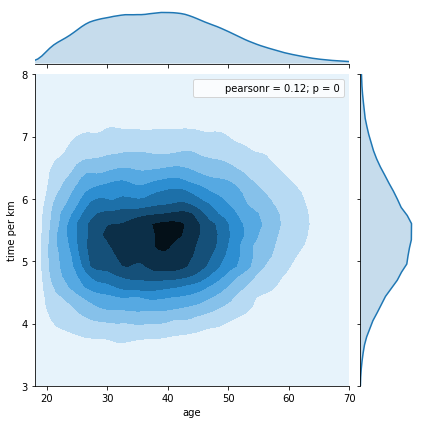

In [43]:
sns.jointplot(
    "age",
    "time per km",
    data=df,
    kind='kde',
    xlim=[18, 70],
    ylim=[3, 8]
)

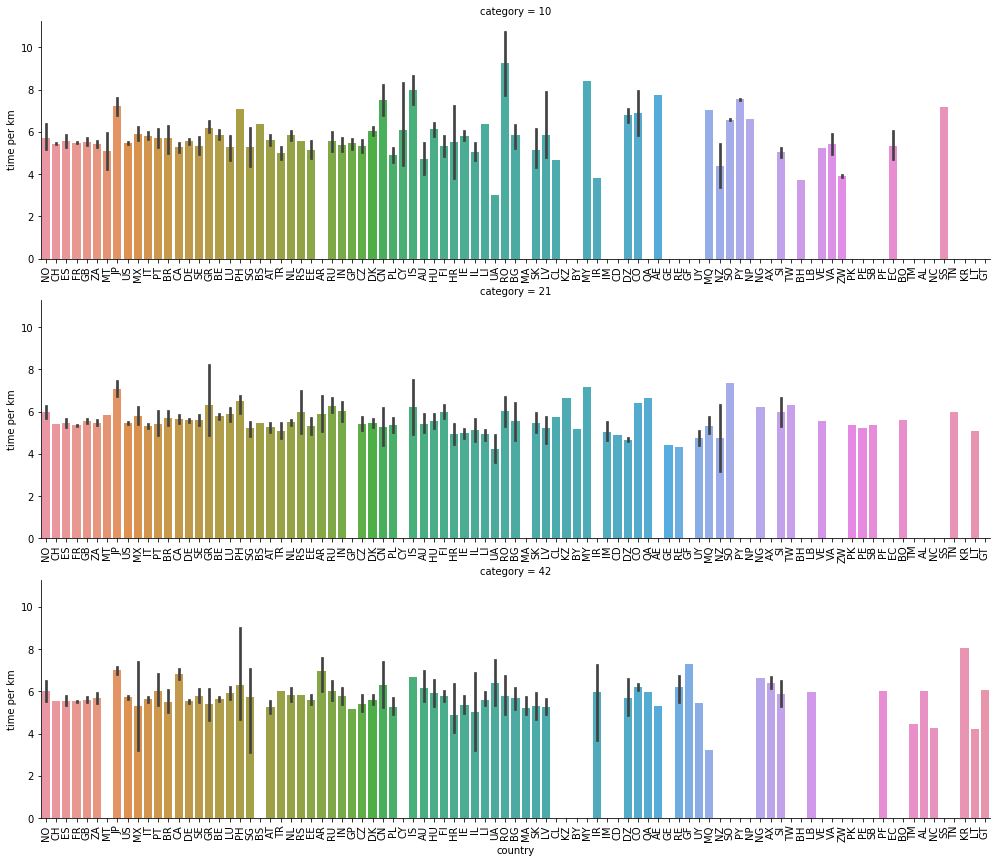

In [66]:
g = sns.factorplot(
    x = 'country',
    y = 'time per km',
    data = df,
    row = 'category',
    kind = 'bar',
    size = 4,
    aspect = 3.5
)
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=90)